In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as inter 
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.special import ellipe
from scipy.special import ellipk
from mpl_toolkits.mplot3d import Axes3D

In [2]:
"""# Parameters for Galaxy NGC 5533
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
h = 8.9                                                     #radial scale-length (kpc)
rho00 = 0.31e9                                              #central 3D density (solar mass/kpc^2) 
epsdisk = 5.0                                               #mass-to-light ratio disk
absmag = -22.02                                             #absolute magnitude 
magsun = 4.42                                               #absolute magnitude of the sun"""

# Parameters for Galaxy NGC 5907
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
h = 5.7                                                     #radial scale-length (kpc)
#rho00 = 0.31e9                                              #central 3D density (solar mass/kpc^2) 
rho00 = 89                                                  #central 3D density (solar mass/kpc^2) 


z0 = lambda h: 0.2*h                                        #half-thickness (kpc)
R = lambda h: 4*h                                           #cut-off radius (kpc)
d = lambda h: 0.2*h                                         #cut-off length upper limits (kpc)
print("z0 = {}.".format(z0(h)))
print("R = {}.".format(R(h)))
print("delta = {}.".format(d(h)))

z0 = 0.83
R = 19.3
d = 0.9

rd = np.linspace(0.1, 150, num=500)

z0 = 1.1400000000000001.
R = 22.8.
delta = 1.1400000000000001.


In [3]:
# Definitions
def x(r,u,xi):
    return ((r**2)+(u**2)+(xi**2))/(2*r*u)

def px(r,u,xi):
    return x(r,u,xi)-(np.sqrt((x(r,u,xi)**2)-1))

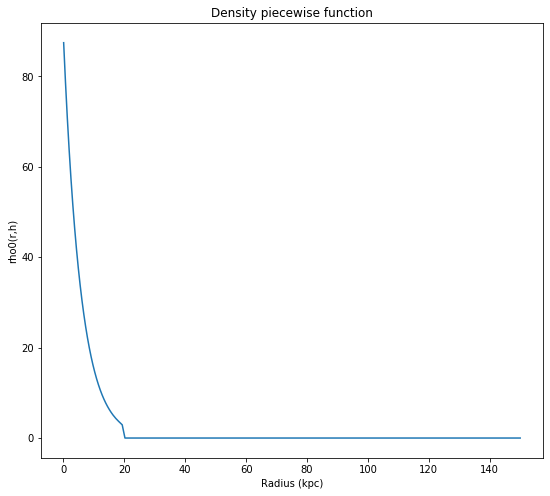

In [4]:
# Density piecewise function
def rho0(r):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: rho00*np.exp(-r/h), lambda r: rho00*np.exp(-R/h)*(1-(r-R)/d), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

# Plot 
plt.figure(figsize=(9,8))
plt.plot(rd,rho0(rd))
plt.title("Density piecewise function")
plt.xlabel("Radius (kpc)")
plt.ylabel("rho0(r,h)")
plt.show()

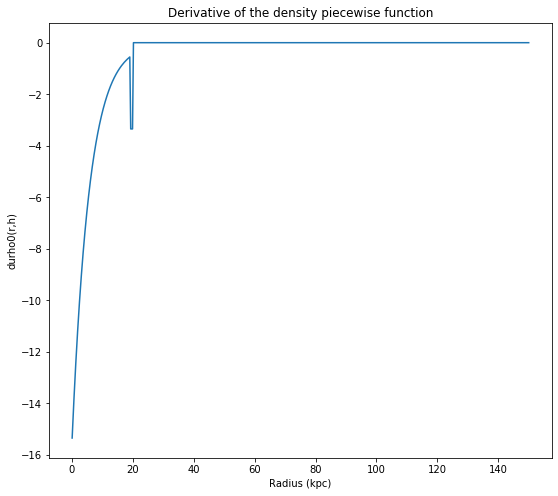

In [5]:
# Partial derivative of rho0
def durho0(r):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: -(1/h)*rho00*np.exp(-r/h), lambda r: -(1/d)*rho00*np.exp(-R/h), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

# Plot 
plt.figure(figsize=(9,8))
plt.plot(rd,durho0(rd))
plt.title("Derivative of the density piecewise function")
plt.xlabel("Radius (kpc)")
plt.ylabel("durho0(r,h)")
plt.show()

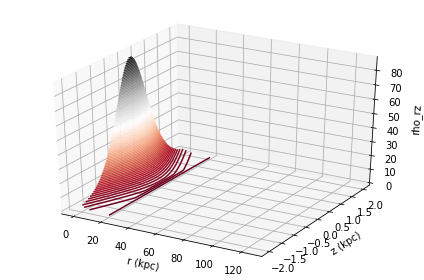

In [6]:
# Disk density distribution
def rho_rz(r,z):
    return rho0(r)*(np.power(np.cosh(z/z0), (-2)))

# Plot
za = np.linspace(-2, 2, 500)
ra = np.linspace(0.1, 125, 500)

RA, ZA = np.meshgrid(ra, za)
RZ = rho_rz(RA, ZA)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RA, ZA, RZ, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('rho_rz');

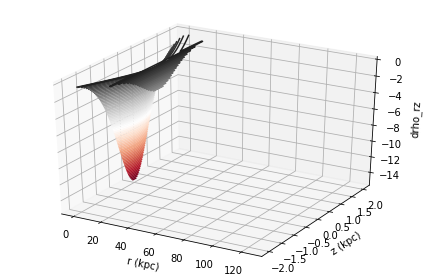

In [7]:
# Derivative of the disk density distribution
def drho_rz(r,z):
    return durho0(r)*(np.power(np.cosh(z/z0), (-2)))

# Plot
DRA, DZA = np.meshgrid(ra, za)
DRZ = drho_rz(DRA, DZA)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(DRA, DZA, DRZ, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('drho_rz');

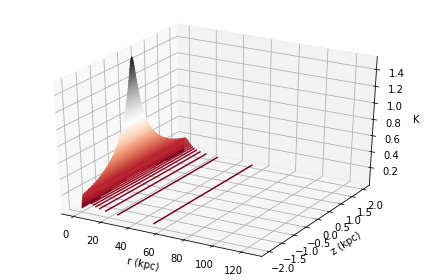

In [8]:
# Complete elliptic integral
def K(r,u,xi):
    return ellipk(px(r,u,xi)) - ellipe(px(r,u,xi))

# Plot
KRA, KZA = np.meshgrid(ra, za)
KRZ = K(KRA,1,KZA)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(KRA, KZA, KRZ, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('K');

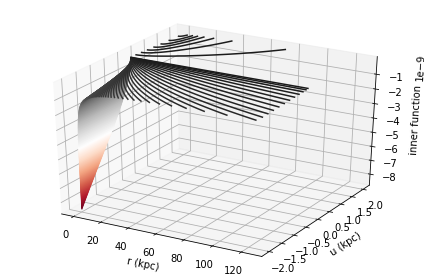

In [9]:
# Inner function
def innerf(r,u,z): 
    return u*drho_rz(u,z)*2*K(r,u,z)/(np.pi*np.sqrt(r*u*px(r,u,z)))

# Plot
INNERFRA, INNERFZA = np.meshgrid(ra, za)
INNERFRZ = innerf(INNERFRA,INNERFZA,10)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(INNERFRA, INNERFZA, INNERFRZ, 500, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('u (kpc)')
ax.set_zlabel('inner function');

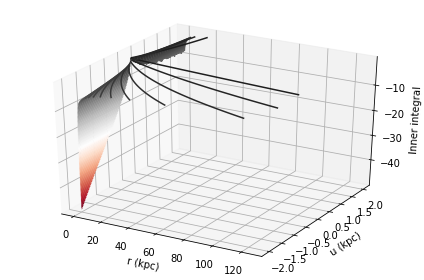

In [10]:
# Integrate function
innerf2 = lambda z,r,u: innerf(r,u,z)

def intinnerf(r,u): 
    return quad(innerf2, 0, R+d, args=(r,u,))[0]

# Vectorize
intinnerf = np.vectorize(intinnerf)

# Plot
INTINRA, INTINZA = np.meshgrid(ra, za)
INTINRZ = intinnerf(INTINRA,INTINZA)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(INTINRA, INTINZA, INTINRZ, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('u (kpc)')
ax.set_zlabel('Inner integral');

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


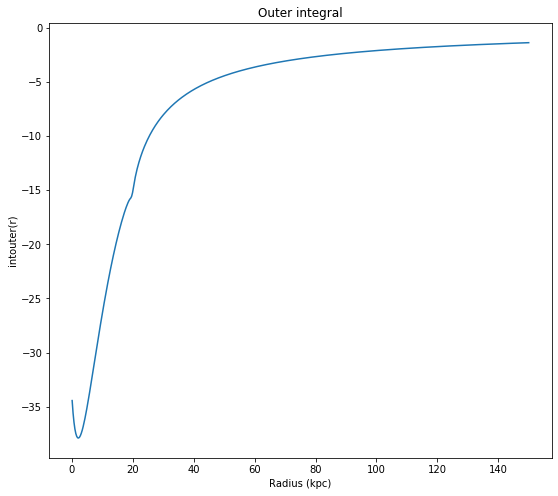

In [11]:
# Integrate outer function
intinnerf2 = lambda u,r: intinnerf(r,u)

def intouterf(r): 
    return quad(intinnerf2, 0, np.inf, args=(r,))[0]

# Vectorize
intouterf = np.vectorize(intouterf)

# Plot 
plt.figure(figsize=(9,8))
plt.plot(rd,intouterf(rd))
plt.title("Outer integral")
plt.xlabel("Radius (kpc)")
plt.ylabel("intouter(r)")
plt.show()

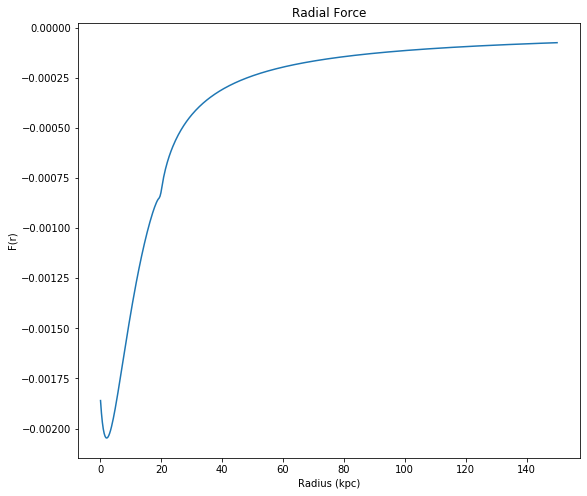

In [12]:
# Radial force
F = lambda r: 4*np.pi*G*intouterf(r)

# Vectorize
Fv = np.vectorize(F)

# Plot 
plt.figure(figsize=(9,8))
plt.plot(rd,F(rd))
plt.title("Radial Force")
plt.xlabel("Radius (kpc)")
plt.ylabel("F(r)")
plt.show()

In [13]:
# Disk velocity
v = np.sqrt(-rd*Fv(rd))

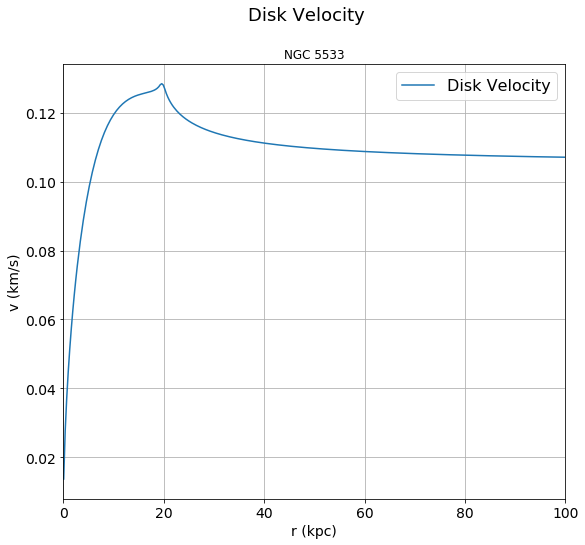

In [14]:
# Plot
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(rd, v, linestyle='solid', label='Disk Velocity')

plt.axis('tight');

fig.suptitle('Disk Velocity', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,100)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
#plt.savefig('DiskVelocity100pts.png')
plt.show()